# SOM (Self-Organizing Map) - Manual - Iris DataSet

### Aprendizagem não supervisionada 
### Clusterização

## Importação das bibliotecas necessárias

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
base = pd.read_csv('../bases/iris.csv')
entradas = base.iloc[:, 0:len(base.columns) -1].values 
classes = base.iloc[:,len(base.columns)-1].values
NumColunas = len(base.columns) - 1
entradas = np.asarray(entradas, dtype=np.float32)
base.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Pré-processamento dos Dados de Entrada

### Padronização dos dados

In [3]:
def Padronizacao(entradas):
    for i in range (len(base.columns)-1):
        entradas[:,i] = (entradas[:,i] - np.median(entradas[:,i]))/entradas[:,i].std(axis = 0)
    return entradas

### Normalização dos dados

In [4]:
def Normalizacao(entradas):
    for i in range (len(base.columns)-1):
        entradas[:,i] = (entradas[:,i] - np.min(entradas[:,i]))/(np.max(entradas[:,i]) - np.min(entradas[:,i]))
    return entradas

### Transformação das classes para o tipo numérico

In [5]:
labelEncoder = LabelEncoder()
classesN = labelEncoder.fit_transform(classes)
print(classesN)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Plotagem dos dados (colunas 1 e 2)

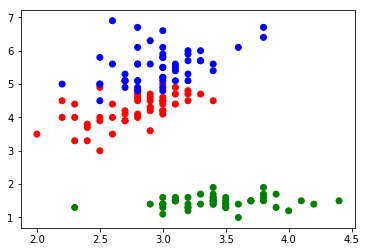

In [6]:
x = base.iloc[:,1].values
y = base.iloc[:,2].values

color= ['red' if l == 1 else 'blue' if l == 2 else 'green' for l in classesN]
plt.scatter(x, y, color=color)

## Entradas do usuário e demais atributos

In [7]:
epocas = int(input('\033[1m' + "Digite a quantidade de épocas: "))
TaxaAprendIni = float(input('\033[1m' + "Digite a taxa de aprendizado: "))
linhas = int(input('\033[1m' + "Digite a quantidade de linhas da rede SOM: "))
colunas = int(input('\033[1m' + "Digite a quantidade de colunas da rede SOM: "))
TamVizIni = int(input('\033[1m' + "Digite o tamanho da vizinhança da rede SOM: "))
tempTamViz = len(entradas)/math.log(TamVizIni)
print("Digite:")
print("1: Normalização dos dados ")
print("2: Padronização dos dados ")
PadNorm = int(input(""))
if (PadNorm == 1):
    entradas = Normalizacao(entradas)
else:    
    entradas = Padronizacao(entradas)
k =  int(input('\033[1m' + "Digite o valor dos K vizinhos para o KNN: "))

    
dimensoes = NumColunas
pesos = np.random.uniform(size = (linhas, colunas, dimensoes))
pesosAnt = np.zeros((linhas, colunas, dimensoes))
raioIni = max(colunas, linhas) / 2
CalcularVizinhanca = np.zeros((linhas, colunas))

Digite a quantidade de épocas: 100
Digite a taxa de aprendizado: 0.5
Digite a quantidade de linhas da rede SOM: 5
Digite a quantidade de colunas da rede SOM: 5
Digite o tamanho da vizinhança da rede SOM: 5
Digite:
1: Normalização dos dados 
2: Padronização dos dados 
2
Digite o valor dos K vizinhos para o KNN: 5


In [8]:
coordenadas = np.zeros([linhas,colunas,2],dtype=np.int32)
for i in range(0, linhas):
    for j in range(0, colunas):
        coordenadas[i][j] = [i,j]

In [9]:
raio = raioIni
TaxaAprend = TaxaAprendIni
max_iterations = len(entradas)+1
too_many_iterations = 10 * max_iterations
convergencia = [1]
e = 0.001 
flag = 0
epoca = 0

### Treinamento

In [10]:
while epoca < epocas:
    shuffle = np.random.randint(len(entradas), size=len(entradas))
    for i in range(len(entradas)):   
        # Distância euclidiana
        J = np.linalg.norm(pesos - pesosAnt)
        # Condição para convergência
        if  J <= e: 
            flag = 1
            break            
        else:            
            entrada = entradas[shuffle[i]]
            entrada_mod = np.tile(entrada, (linhas, colunas, 1))
            Distancias = np.linalg.norm(entrada_mod - pesos, axis=2)
                                   
            # Obtem o neurônio vencedor, ou seja, o que tem menor distância
            BMU = np.unravel_index(np.argmin(Distancias, axis=None), Distancias.shape)            
            pesosAnt = np.copy(pesos)             
                                    
            # Funcao de Vizinhança
            # equação 3.18 - notas de aulas - IFCE - ICA
            for l in range(linhas):
                for m in range(colunas):
                    if ((l == BMU[0]) and (m == BMU[1])):
                        CalcularVizinhanca[l][m] = 1
                    else:
                        CalcularVizinhanca[l][m] = math.exp(-(((BMU[0] - l)**2) + ((BMU[1] - m)**2))/tempTamViz**2)
            
            for i in range(linhas):
                for j in range(colunas):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
                    if distance <= raio:
                        # Atualização do vetor de pesos
                        pesos[i][j] = pesos[i][j] + TaxaAprend * CalcularVizinhanca[i][j] * (entrada-pesos[i][j])
                        
            TaxaAprend = TaxaAprendIni * (1- (epoca/ epocas)) # WTA - Winner Take All
            
            # decaimento do spread
            raio = raioIni * math.exp(-epoca/epocas)            
            
    if J < min(convergencia):
        pesos_finais = pesos
    convergencia.append(J)
    
    if flag==1:
        break
    epoca+=1

### Plotagem da taxa de erro x época

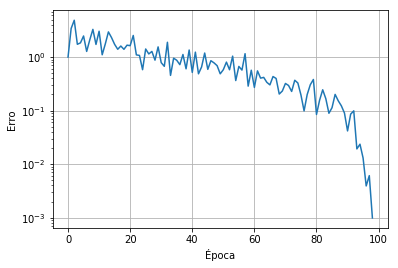

Erro final: 0.0009911410545760642


In [11]:
plt.plot(convergencia)
plt.ylabel('Erro')
plt.xlabel('Época')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Erro final: ' + str(J))

### Plotagem da Rede SOM

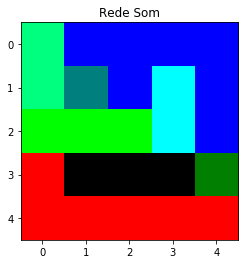

In [12]:
BMU = np.zeros([2],dtype=np.int32)
result_map = np.zeros([linhas,colunas,3],dtype=np.float32)

i=0
for entrada in entradas:    
    entrada_mod = np.tile(entrada, (linhas, colunas, 1))
    Distancias = np.linalg.norm(entrada_mod - pesos_finais, axis=2)

    # Obtem o neurônio vencedor, ou seja, o que tem menor distância
    BMU = np.unravel_index(np.argmin(Distancias, axis=None), Distancias.shape)
    
    x = BMU[0]
    y = BMU[1]
    
    if classesN[i] == 0:
        if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5,0,0])
    elif classesN[i] == 1:
        if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0,0.5,0])
    elif classesN[i] == 2:
        if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0,0,0.5])
    i+=1
result_map = np.flip(result_map,0)
plt.title("Rede Som")
plt.imshow(result_map, interpolation='nearest')

## KNN

### Localização das K classes mais próximas  

In [13]:
pesos = pesos_finais.reshape(linhas * colunas, dimensoes)
matrizTempKNN = np.zeros((linhas * colunas, len(entradas)))
matrizKNN = np.zeros((linhas * colunas, k))
matrizKNNPos = np.zeros((linhas * colunas, k))

for i in range(linhas * colunas):
    for j in range(len(entradas)):
        matrizTempKNN[i][j] = np.linalg.norm(pesos[i] - entradas[j])
        # Linhas representam os neurônios e colunas as entradas

    for m in range(k):        
        menor = min(matrizTempKNN[i])        
        n_pos = matrizTempKNN[i].argmin() 
        matrizKNNPos[i][m] = n_pos
        matrizKNN[i][m] = classesN[n_pos]
        matrizTempKNN[i][n_pos] = 99999

In [14]:
def unique(list1):   
    unique_list = [] 
    for x in list1: 
        if x not in unique_list: 
            unique_list.append(x) 
    return x

### Criação da matriz KNN (representação dos neurônios)

In [15]:
NumClasses = unique(classesN) 

for i in range(linhas * colunas):     
    for j in range(k):  
        matrizKNN[i][j] = matrizKNN[i][j] + 1

In [16]:
M_KNN = np.zeros((linhas * colunas, NumClasses+1))

for i in range(linhas * colunas):     
    for j in range(k):       
        M_KNN[i][int(matrizKNN[i][j])-1] = M_KNN[i][int(matrizKNN[i][j])-1] + 1        

In [17]:
print(M_KNN)

[[5. 0. 0.]
 [5. 0. 0.]
 [5. 0. 0.]
 [5. 0. 0.]
 [5. 0. 0.]
 [5. 0. 0.]
 [0. 5. 0.]
 [5. 0. 0.]
 [0. 5. 0.]
 [0. 5. 0.]
 [0. 5. 0.]
 [0. 5. 0.]
 [0. 5. 0.]
 [0. 1. 4.]
 [0. 0. 5.]
 [0. 5. 0.]
 [0. 5. 0.]
 [0. 0. 5.]
 [0. 1. 4.]
 [0. 0. 5.]
 [0. 3. 2.]
 [0. 0. 5.]
 [0. 0. 5.]
 [0. 0. 5.]
 [0. 0. 5.]]


### Resultados do KNN

In [18]:
resultados = np.zeros(linhas * colunas)
for i in range(linhas * colunas):
        cont = 0
        maximo = np.max(M_KNN[i])   
        id_max = M_KNN[i].argmax()
        for j in range(NumClasses):    
            if (maximo == M_KNN[i][j]):
                cont = cont + 1
            if (cont > 1):
                resultados[i] = 9
            else:
                resultados[i] = id_max
        print("Neurônio: "+ str(i + 1) + " - classe: "+ str(resultados[i]+1))    

Neurônio: 1 - classe: 1.0
Neurônio: 2 - classe: 1.0
Neurônio: 3 - classe: 1.0
Neurônio: 4 - classe: 1.0
Neurônio: 5 - classe: 1.0
Neurônio: 6 - classe: 1.0
Neurônio: 7 - classe: 2.0
Neurônio: 8 - classe: 1.0
Neurônio: 9 - classe: 2.0
Neurônio: 10 - classe: 2.0
Neurônio: 11 - classe: 2.0
Neurônio: 12 - classe: 2.0
Neurônio: 13 - classe: 2.0
Neurônio: 14 - classe: 3.0
Neurônio: 15 - classe: 3.0
Neurônio: 16 - classe: 2.0
Neurônio: 17 - classe: 2.0
Neurônio: 18 - classe: 3.0
Neurônio: 19 - classe: 3.0
Neurônio: 20 - classe: 3.0
Neurônio: 21 - classe: 2.0
Neurônio: 22 - classe: 3.0
Neurônio: 23 - classe: 3.0
Neurônio: 24 - classe: 3.0
Neurônio: 25 - classe: 3.0
